In [1]:
import numpy as np
import pandas as pd
import sklearn
import os
import string
from matplotlib import pyplot as plt
%matplotlib inline

## Данные

In [2]:
X_train = pd.read_csv("train_data.csv", sep = ',')
y_train = pd.read_csv("train_target.csv", sep = ',', header = None)
X_test = pd.read_csv("test_data.csv", sep = ',', index_col = 0)

In [3]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,student,single,high.school,no,no,no,telephone,jun,mon,901,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
1,46,admin.,married,university.degree,no,yes,no,cellular,aug,tue,208,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
2,49,blue-collar,married,basic.4y,unknown,yes,yes,telephone,jun,tue,131,5,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
3,31,technician,married,university.degree,no,no,no,cellular,jul,tue,404,1,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2
4,42,housemaid,married,university.degree,no,yes,no,telephone,nov,mon,85,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [4]:
X_train.shape

(27595, 20)

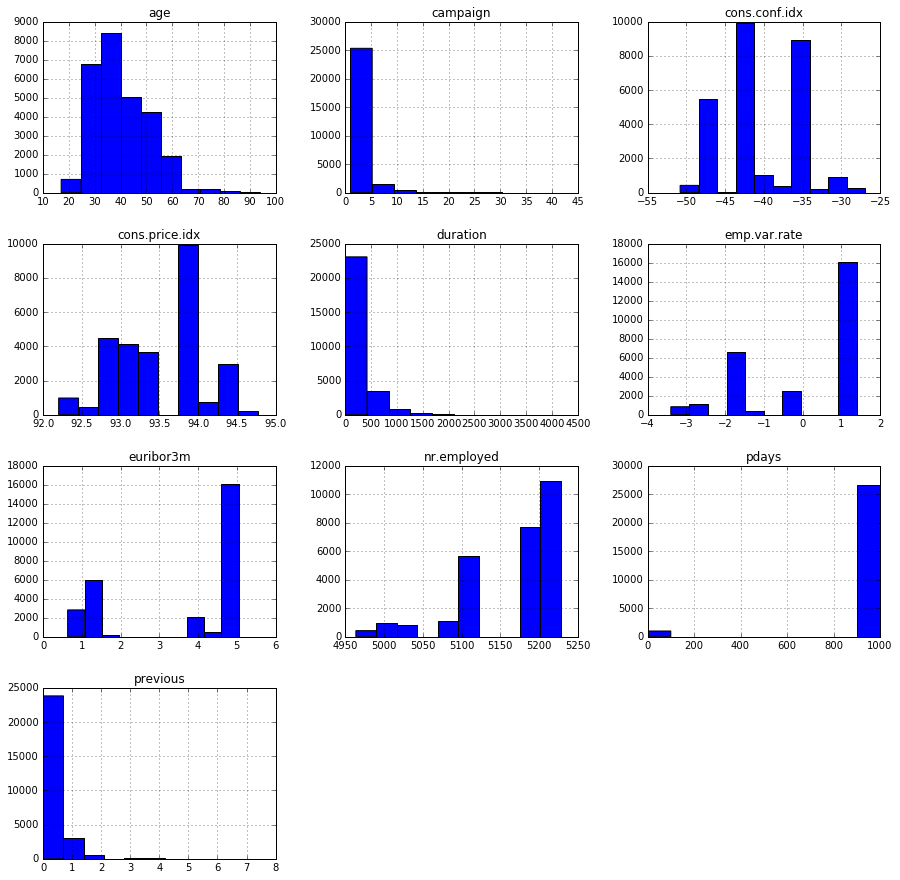

In [5]:
X_train.hist(figsize = (15, 15));

In [6]:
y_train.shape

(27595, 1)

In [7]:
X_train.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed'],
      dtype='object')

In [8]:
X_train.shape

(27595, 20)

## Кодирование признаков

### Посмотрим на признаки marital, job, default, еducation

In [9]:
for i in ['marital', 'job', 'default', 'education']:
    print (X_train[i].value_counts())
    print ('')

married     16692
single       7772
divorced     3074
unknown        57
Name: marital, dtype: int64

admin.           6996
blue-collar      6160
technician       4488
services         2697
management       1994
retired          1183
entrepreneur      954
self-employed     922
housemaid         718
unemployed        678
student           583
unknown           222
Name: job, dtype: int64

no         21800
unknown     5792
yes            3
Name: default, dtype: int64

university.degree      8128
high.school            6424
basic.9y               4065
professional.course    3502
basic.4y               2777
basic.6y               1526
unknown                1162
illiterate               11
Name: education, dtype: int64



### Удалим 'unknown' из marital, job, education

### Преобразуем в бинарные оставшиеся признаки marital, contact, loan, housing, pdays и previous

In [10]:
dict_1 = {'yes' : 0, 'no' : 1, 'unknown' : 1}
dict_2 = {'divorced' : 0, 'single' : 0, 'married' : 1} #'unknown' : 0
#dict_3 = {'admin.' : 0, 'blue-collar' : 0, 'entrepreneur' : 0, 'management' : 0, 'self-employed' : 0, 'services' : 0, 'technician' : 0,
#          'housemaid' : 1, 'retired' : 1,  'student' : 1,  'unemployed' : 1} # 'unknown' : 1
dict_4 = {'cellular' : 0, 'telephone' : 1}

In [11]:
X_train['marital'] = X_train['marital'].map(dict_2)
#X_train['job'] = X_train['job'].map(dict_3)
X_train['contact'] = X_train['contact'].map(dict_4)

X_test['marital'] = X_test['marital'].map(dict_2)
#X_test['job'] = X_test['job'].map(dict_3)
X_test['contact'] = X_test['contact'].map(dict_4)

In [12]:
X_train.shape

(27595, 20)

In [13]:
for i in ['loan', 'housing']:  
    X_train[i] = X_train[i].map(dict_1)
    X_test[i] = X_test[i].map(dict_1)

In [14]:
X_train['pdays_before'] = X_train.apply(lambda row: 1 if row['pdays'] != 999 else 0, axis=1)    
X_train = X_train.drop(['default', 'pdays'], axis = 1)

In [15]:
X_test['pdays_before'] = X_test.apply(lambda row: 1 if row['pdays'] != 999 else 0, axis=1)    
X_test = X_test.drop(['default', 'pdays'], axis = 1)

In [16]:
X_train.columns

Index([u'age', u'job', u'marital', u'education', u'housing', u'loan',
       u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'pdays_before'],
      dtype='object')

In [17]:
X_train['previous_new'] = X_train.apply(lambda row: 1 if row['previous'] >= 1 else 0, axis=1)
X_train = X_train.drop(['previous'], axis = 1)

In [18]:
X_test['previous_new'] = X_test.apply(lambda row: 1 if row['previous'] >= 1 else 0, axis=1)
X_test = X_test.drop(['previous'], axis = 1)

### Преобразование категориальных признаков month, day_of_week, poutcome, education, job с помощью DictVectorizer 

In [19]:
from sklearn.feature_extraction import DictVectorizer

In [20]:
categories = ['month', 'day_of_week', 'poutcome', 'education', 'job']
dict_vectorizer = DictVectorizer()
features = X_train[categories].T.to_dict().values()
X_category = dict_vectorizer.fit_transform(features).toarray()
X_category = pd.DataFrame(X_category, columns = dict_vectorizer.get_feature_names())

In [21]:
features_test = X_test[categories].T.to_dict().values()
X_category_test = dict_vectorizer.transform(features_test).toarray()
X_category_test = pd.DataFrame(X_category_test, columns = dict_vectorizer.get_feature_names())

In [22]:
X_train = pd.concat([X_train, X_category], axis = 1)
X_train = X_train.drop(['month', 'day_of_week', 'poutcome', 'education', 'job'], axis = 1)

In [23]:
X_test = pd.concat([X_test, X_category_test], axis = 1)
X_test = X_test.drop(['month', 'day_of_week', 'poutcome', 'education', 'job'], axis = 1)

In [24]:
X_train.columns

Index([u'age', u'marital', u'housing', u'loan', u'contact', u'duration',
       u'campaign', u'emp.var.rate', u'cons.price.idx', u'cons.conf.idx',
       u'euribor3m', u'nr.employed', u'pdays_before', u'previous_new',
       u'day_of_week=fri', u'day_of_week=mon', u'day_of_week=thu',
       u'day_of_week=tue', u'day_of_week=wed', u'education=basic.4y',
       u'education=basic.6y', u'education=basic.9y', u'education=high.school',
       u'education=illiterate', u'education=professional.course',
       u'education=university.degree', u'education=unknown', u'job=admin.',
       u'job=blue-collar', u'job=entrepreneur', u'job=housemaid',
       u'job=management', u'job=retired', u'job=self-employed',
       u'job=services', u'job=student', u'job=technician', u'job=unemployed',
       u'job=unknown', u'month=apr', u'month=aug', u'month=dec', u'month=jul',
       u'month=jun', u'month=mar', u'month=may', u'month=nov', u'month=oct',
       u'month=sep', u'poutcome=failure', u'poutcome=nonexis

In [25]:
X_test.columns

Index([u'age', u'marital', u'housing', u'loan', u'contact', u'duration',
       u'campaign', u'emp.var.rate', u'cons.price.idx', u'cons.conf.idx',
       u'euribor3m', u'nr.employed', u'pdays_before', u'previous_new',
       u'day_of_week=fri', u'day_of_week=mon', u'day_of_week=thu',
       u'day_of_week=tue', u'day_of_week=wed', u'education=basic.4y',
       u'education=basic.6y', u'education=basic.9y', u'education=high.school',
       u'education=illiterate', u'education=professional.course',
       u'education=university.degree', u'education=unknown', u'job=admin.',
       u'job=blue-collar', u'job=entrepreneur', u'job=housemaid',
       u'job=management', u'job=retired', u'job=self-employed',
       u'job=services', u'job=student', u'job=technician', u'job=unemployed',
       u'job=unknown', u'month=apr', u'month=aug', u'month=dec', u'month=jul',
       u'month=jun', u'month=mar', u'month=may', u'month=nov', u'month=oct',
       u'month=sep', u'poutcome=failure', u'poutcome=nonexis

## Аge

X_train['age'].min(), X_train['age'].max()

list_17 = 0
list_30 = 0
list_40 = 0
list_50 = 0
list_60 = 0
list_70 = 0
list_80 = 0
for i in X_train['age']:
    if (i >= 17) and (i < 30):
        list_17 += 1
    if (i >= 30) and (i < 40):
        list_30 += 1
    if (i >= 40) and (i < 50):
        list_40 += 1
    if (i >= 50) and (i < 60):
        list_50 += 1
    if (i >= 60) and (i < 70):
        list_60 += 1
    if (i >= 70) and (i < 80):
        list_70 += 1
    else:
        list_80 += 1     

print('Age from 17 to 30 is {}'.format(list_17))
print('Age from 30 to 40 is {}'.format(list_30))
print('Age from 40 to 50 is {}'.format(list_40))
print('Age from 50 to 60 is {}'.format(list_50))
print('Age from 60 to 70 is {}'.format(list_60))
print('Age from 70 to 80 is {}'.format(list_70))
print('Age from 80 to 94 is {}'.format(list_80))

X_train['age_group_40_80'] = (X_train['age'] >= 40) & (X_train['age'] < 80)
X_train['age_group_17_30'] = X_train['age'] < 30
X_train['age_group_30_40'] = (X_train['age'] >= 30) & (X_train['age'] < 40)
X_train['age_group_80_94'] = X_train['age'] > 80

X_train.drop(['age'], axis = 1, inplace = True)

X_train['age_group_40_80'] = X_train['age_group_40_80'].astype(int)
X_train['age_group_17_30'] = X_train['age_group_17_30'].astype(int)
X_train['age_group_30_40'] = X_train['age_group_30_40'].astype(int)
X_train['age_group_80_94'] = X_train['age_group_80_94'].astype(int)

X_train.head()

X_test['age_group_40_80'] = (X_test['age'] >= 40) & (X_test['age'] < 80)
X_test['age_group_17_30'] = X_test['age'] < 30
X_test['age_group_30_40'] = (X_test['age'] >= 30) & (X_test['age'] < 40)
X_test['age_group_80_94'] = X_test['age'] > 80

X_test.drop(['age'], axis = 1, inplace = True)

X_test['age_group_40_80'] = X_test['age_group_40_80'].astype(int)
X_test['age_group_17_30'] = X_test['age_group_17_30'].astype(int)
X_test['age_group_30_40'] = X_test['age_group_30_40'].astype(int)
X_test['age_group_80_94'] = X_test['age_group_80_94'].astype(int)

## Education

X_train['education_basic'] = (X_train['education'] == 'basic.4y') | (X_train['education'] == 'basic.6y')  | (X_train['education'] == 'illiterate') 
X_train['education_school'] = (X_train['education'] == 'basic.9y') | (X_train['education'] == 'high.school') 
X_train['education_high'] = (X_train['education'] == 'professional.course') | (X_train['education'] == 'university.degree')
#X_train['education_unknow'] = (X_train['education'] == 'unknown')

X_train.drop(['education'], axis = 1, inplace = True)

X_train['education_basic'] = X_train['education_basic'].astype(int)
X_train['education_school'] = X_train['education_school'].astype(int)
X_train['education_high'] = X_train['education_high'].astype(int)
#X_train['education_unknow'] = X_train['education_unknow'].astype(int)

X_test['education_basic'] = (X_test['education'] == 'basic.4y') | (X_test['education'] == 'basic.6y') |  (X_test['education'] == 'illiterate')
X_test['education_school'] = (X_test['education'] == 'basic.9y') | (X_test['education'] == 'high.school') 
X_test['education_high'] = (X_test['education'] == 'professional.course') | (X_test['education'] == 'university.degree')
#X_test['education_unknow'] = (X_test['education'] == 'unknown')  
X_test.drop(['education'], axis = 1, inplace = True)

X_test['education_basic'] = X_test['education_basic'].astype(int)
X_test['education_school'] = X_test['education_school'].astype(int)
X_test['education_high'] = X_test['education_high'].astype(int)
#X_test['education_unknow'] = X_test['education_unknow'].astype(int)

## Корреляция

In [26]:
names = [#'age_group_17_30', 'age_group_30_40', 'age_group_40_80', 'age_group_80_94', 
         'duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'contact',       'day_of_week=fri', 'previous_new', 'campaign', 'day_of_week=mon', 'day_of_week=thu', 'day_of_week=tue', 'day_of_week=wed',  'month=apr', 'pdays_before', # 'education_basic', 'education_school', 'education_high', 'education_unknow', 
'month=aug', 'month=dec', 'month=jul', 'month=jun', 'month=mar', 'month=may', 'month=nov', 'month=oct', 'month=sep', 'poutcome=failure', 'poutcome=nonexistent', 'poutcome=success']
names_for_corr = X_train[names]
corr_ = names_for_corr.corr()
corr_

,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact,day_of_week=fri,previous_new,campaign,...,month=jul,month=jun,month=mar,month=may,month=nov,month=oct,month=sep,poutcome=failure,poutcome=nonexistent,poutcome=success
duration,1.000000,-0.034308,0.001166,-0.012445,-0.039330,-0.049034,-0.029910,-0.009591,0.013792,-0.075007,...,0.024338,-0.020277,-0.002505,0.008654,-0.017984,0.013703,0.011933,-0.009130,-0.013792,0.041869
emp.var.rate,-0.034308,1.000000,0.773356,0.197029,0.971966,0.906407,0.395713,-0.015883,-0.474324,0.152108,...,0.314389,0.148851,-0.143040,-0.109436,-0.107899,-0.213679,-0.168892,-0.384679,0.474324,-0.255458
cons.price.idx,0.001166,0.773356,1.000000,0.058647,0.685298,0.519069,0.595781,0.000409,-0.304190,0.129243,...,0.251556,0.449829,-0.099396,-0.054677,-0.219626,-0.091987,-0.043679,-0.297995,0.304190,-0.076867
cons.conf.idx,-0.012445,0.197029,0.058647,1.000000,0.277765,0.100704,0.245508,-0.007367,-0.097195,-0.014175,...,-0.185797,-0.090372,-0.057980,-0.006937,-0.054610,0.170043,0.167125,-0.157922,0.097195,0.081749
euribor3m,-0.039330,0.971966,0.685298,0.277765,1.000000,0.945204,0.400181,-0.016099,-0.491134,0.136463,...,0.281131,0.140114,-0.168697,-0.132196,0.019100,-0.185632,-0.190495,-0.389099,0.491134,-0.280132
nr.employed,-0.049034,0.906407,0.519069,0.100704,0.945204,1.000000,0.270674,-0.011658,-0.495992,0.144706,...,0.298129,0.160695,-0.183052,-0.171099,0.028112,-0.272243,-0.292404,-0.353894,0.495992,-0.349112
contact,-0.029910,0.395713,0.595781,0.245508,0.400181,0.270674,1.000000,0.039072,-0.244296,0.077891,...,-0.199664,0.387190,-0.064542,0.345436,-0.186965,-0.044830,-0.048263,-0.208817,0.244296,-0.113446
day_of_week=fri,-0.009591,-0.015883,0.000409,-0.007367,-0.016099,-0.011658,0.039072,1.000000,0.007500,0.027498,...,-0.058954,0.027279,-0.006361,0.035210,-0.003539,-0.000373,0.003872,0.017677,-0.007500,-0.015617
previous_new,0.013792,-0.474324,-0.304190,-0.097195,-0.491134,-0.495992,-0.244296,0.007500,1.000000,-0.089371,...,-0.140211,-0.086281,0.067482,0.021310,0.099284,0.116793,0.123944,0.853206,-1.000000,0.467030
campaign,-0.075007,0.152108,0.129243,-0.014175,0.136463,0.144706,0.077891,0.027498,-0.089371,1.000000,...,0.099756,0.068783,-0.011213,-0.031266,-0.081446,-0.050101,-0.033483,-0.070299,0.089371,-0.051831


In [27]:
s = corr_.unstack()

In [28]:
so = s.order(kind = "quicksort")

C:\Users\Asus\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


In [29]:
so.abs()

previous_new          poutcome=nonexistent    1.000000
poutcome=nonexistent  previous_new            1.000000
                      poutcome=failure        0.853206
poutcome=failure      poutcome=nonexistent    0.853206
previous_new          nr.employed             0.495992
nr.employed           previous_new            0.495992
euribor3m             previous_new            0.491134
previous_new          euribor3m               0.491134
pdays_before          poutcome=nonexistent    0.491022
poutcome=nonexistent  pdays_before            0.491022
previous_new          emp.var.rate            0.474324
emp.var.rate          previous_new            0.474324
poutcome=success      poutcome=nonexistent    0.467030
poutcome=nonexistent  poutcome=success        0.467030
poutcome=failure      euribor3m               0.389099
euribor3m             poutcome=failure        0.389099
poutcome=failure      emp.var.rate            0.384679
emp.var.rate          poutcome=failure        0.384679
pdays_befo

In [30]:
#X_train.drop(['housing=yes'], axis = 1, inplace = True)
#X_train.drop(['contact=cellular'], axis = 1, inplace = True)
#X_train.drop(['pdays'], axis = 1, inplace = True)
#X_train.drop(['poutcome=success'], axis = 1, inplace = True)
#X_train.drop(['loan=yes'], axis = 1, inplace = True)
#X_train.drop(['euribor3m'], axis = 1, inplace = True)
#X_train.drop(['emp.var.rate'], axis = 1, inplace = True)
#X_train.drop(['nr.employed'], axis = 1, inplace = True)

In [31]:
#X_test.drop(['housing=yes'], axis = 1, inplace = True)
#X_test.drop(['contact=cellular'], axis = 1, inplace = True)
#X_test.drop(['pdays'], axis = 1, inplace = True)
#X_test.drop(['poutcome=success'], axis = 1, inplace = True)
#X_test.drop(['loan=yes'], axis = 1, inplace = True)
#X_test.drop(['euribor3m'], axis = 1, inplace = True)
#X_test.drop(['emp.var.rate'], axis = 1, inplace = True)
#X_test.drop(['nr.employed'], axis = 1, inplace = True)

## Разделение выборки

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
RANDOM_SEED = 888888
X_train_val, X_test_h, y_train_val, y_test_h = train_test_split(X_train, y_train, 
                                                                test_size = 0.3, random_state = RANDOM_SEED)

In [34]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = 3, random_state = RANDOM_SEED)

In [35]:
from sklearn.model_selection import GridSearchCV

## XGboost

In [36]:
from sklearn.metrics import roc_auc_score
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

from xgboost import XGBClassifier

estimator = XGBClassifier(seed=RANDOM_SEED, reg_alpha=0.005, reg_lambda=0.004)
parameters = {'max_depth': range(2, 10), 'n_estimators': [2, 4, 5, 6, 25, 35, 50, 150], 'objective' : 
         ['reg:linear', 'binary:logistic', 'binary:logitraw', 'rank:pairwise'],
         'gamma': [0, .2, .4]}

xgb = GridSearchCV(estimator, parameters, scoring='roc_auc', verbose = 1, n_jobs = -1)

In [37]:
xgb.fit(X_train_val, y_train_val[0]);

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 21.8min finished


In [38]:
xgb.best_params_

{'gamma': 0.4,
 'max_depth': 4,
 'n_estimators': 150,
 'objective': 'rank:pairwise'}

In [39]:
predict_xgb = xgb.predict_proba(X_test_h)
predict_xgb_auc = roc_auc_score(y_test_h, predict_xgb[:, 1])

print (predict_xgb_auc)

0.949061592039


## Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

parameters = {"criterion":["gini", "entropy"], 
              "max_features":[5, 10, 15, 20, 23, 25, 26, 27, 28, 30, 35],
              "max_depth":[2, 4, 5, 6, 7, 8, 9, 16, 32, 64], 
              "class_weight":[None, "balanced"]}

rfc = GridSearchCV(RandomForestClassifier(random_state = RANDOM_SEED), parameters, n_jobs = -1,
                   verbose = 1, scoring = 'roc_auc',  cv = kf)
rfc.fit(X_train_val, y_train_val.values.ravel());

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 27}

rfc.best_params_

predict_rfc = rfc.predict(X_test_h)

roc_auc_score(y_test_h, predict_rfc)

rfc.best_score_

predict_rfc_proba = rfc.predict_proba(X_test)[:, 1]

## GRAD BOOST

from sklearn.ensemble import GradientBoostingClassifier

parameters_grad = {#'learning_rate' : [0.1, 0.01, 0.05, 0.2, 0.3], 
                   #'min_samples_split' : [500],
                   'min_samples_leaf' : [1, 2, 3],
                   'max_features' : [1, 2, 3, 4, 5, 'log2', 'auto'],
                   #'subsample' : [0.9],
                   'n_estimators': [200, 250, 300],
                   'loss' : ['deviance', 'exponential'],
                   'presort' : [True, False]}                 
grad_bs = GridSearchCV(GradientBoostingClassifier(random_state = RANDOM_SEED), parameters_grad, scoring = "roc_auc", 
                       n_jobs = -1, verbose = 1, cv = kf)
grad_bs.fit(X_train_val, y_train_val[0]);

{'learning_rate': 0.1,
 'loss': 'exponential',
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 500,
 'n_estimators': 250,
 'presort': True,
 'subsample': 0.9}

grad_bs.best_params_

predict_grad = grad_bs.predict(X_test_h)

roc_auc_score(y_test_h, predict_grad)

grad_bs.best_score_

best - 0.94496541389904065



predict_grad_bs = grad_bs.predict_proba(X_test)[:, 1]

## kNN

from sklearn.neighbors import KNeighborsClassifier

parameters_knn = {'n_neighbors' : [30, 40, 50, 60, 70], 
                  'weights' : ['uniform', 'distance'],
                  'algorithm' : ['auto', 'kd_tree', 'ball_tree'],
                  'leaf_size' : [20, 30, 40, 50],
                  'p' : [1, 2]}
                                    
knn = GridSearchCV(KNeighborsClassifier(), parameters_knn, scoring="roc_auc", n_jobs = -1, cv = kf)
knn.fit(X_train_val, y_train_val[0]);

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 70,
 'p': 1,
 'weights': 'distance'}

knn.best_params_

predict_knn = knn.predict(X_test_h)

roc_auc_score(y_test_h, predict_knn)

knn.best_score_

predict_knn_bs = knn.predict_proba(X_test)[:, 1]

## Voting

from sklearn.ensemble import VotingClassifier

parameters_voting = [('rfc', rfc.best_estimator_), ('grad', grad_bs.best_estimator_), ('knn', knn.best_estimator_)]

voting_cl = VotingClassifier(parameters_voting, voting = 'soft')

voting_cl.fit(X_train_val, y_train_val[0]);

predict_voting = voting_cl.predict_proba(X_test_h)
predict_voting_auc = roc_auc_score(y_test_h, predict_voting[:,1])

predict_voting_auc

predict_voting = voting_cl.predict_proba(X_test)[:,1]

## Добавление в файл

In [40]:
prediction_arr = xgb.predict_proba(X_test)[:,1]
prediction = pd.DataFrame(prediction_arr, index = np.arange(0, prediction_arr.shape[0]), columns=['Prediction'])
prediction.to_csv('predition.csv', index_label='Id')

## Итог

Наилучшим образом показал себя XGboost. 